In [15]:
import xarray as xr
import numpy as np
import rioxarray  # Import rioxarray for GeoTIFF export
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [19]:
import os

# Get the current working directory (optional)
current_directory = os.getcwd()
print(f"Current directory: {current_directory}")

# Define the new directory path
new_directory = "I:/loca2/gen_use"  # Replace with your desired path

# Change the directory
try:
    os.chdir(new_directory)
    print(f"Successfully changed directory to: {os.getcwd()}")
except FileNotFoundError:
    print(f"Error: The directory '{new_directory}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Current directory: C:\Users\Ben
Successfully changed directory to: I:\loca2\gen_use


In [21]:
def count_hot_days(file_path):
    """
    Counts the number of days exceeding 100°F during JJA (June, July, August) 
    from 2015-2044 for each grid point in a NetCDF file.

    Args:
        file_path (str): Path to the NetCDF file (e.g., "TEST.nc").

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                         the count of hot days for each grid point.  Returns
                         None if there's an issue opening the file.
    """
    try:
        ds = xr.open_dataset(file_path)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:  # Catch other potential xarray errors
        print(f"Error opening dataset: {e}")
        return None

    # Convert temperature to Fahrenheit 
    ds['tasmax'] = ds['tasmax'] - 273.15  # Convert Kelvin to Celsius
    ds['tasmax'] = (ds['tasmax'] * 9/5) + 32 # Convert Celsius to Fahrenheit

    # Select June, July, and August
    jja_mask = ds['time.month'].isin([6, 7, 8])
    ds_jja = ds.sel(time=jja_mask)

    # Count days exceeding 100°F at each location
    hot_days = ds_jja['tasmax'] > 100
    hot_day_counts = hot_days.groupby('time.dayofyear').sum().sum(dim='dayofyear') # Sum over all days in JJA for each year, then sum over all years.

    return hot_day_counts

# Example usage:
file_path = "tasmax.MPI-ESM1-2-HR.ssp370.r3i1p1f1.2015-2044.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your file path
hot_day_counts = count_hot_days(file_path)

if hot_day_counts is not None:
    print(hot_day_counts)
    # Export to NetCDF
    try:
        hot_day_counts.to_netcdf("VCP_EXHEAT_01A-2__100F_hot_day_counts_2015-2044_MPI.nc")
        print("NetCDF file created successfully!")
    except Exception as e:
        print(f"Error exporting to NetCDF: {e}")

<xarray.DataArray 'tasmax' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
NetCDF file created successfully!


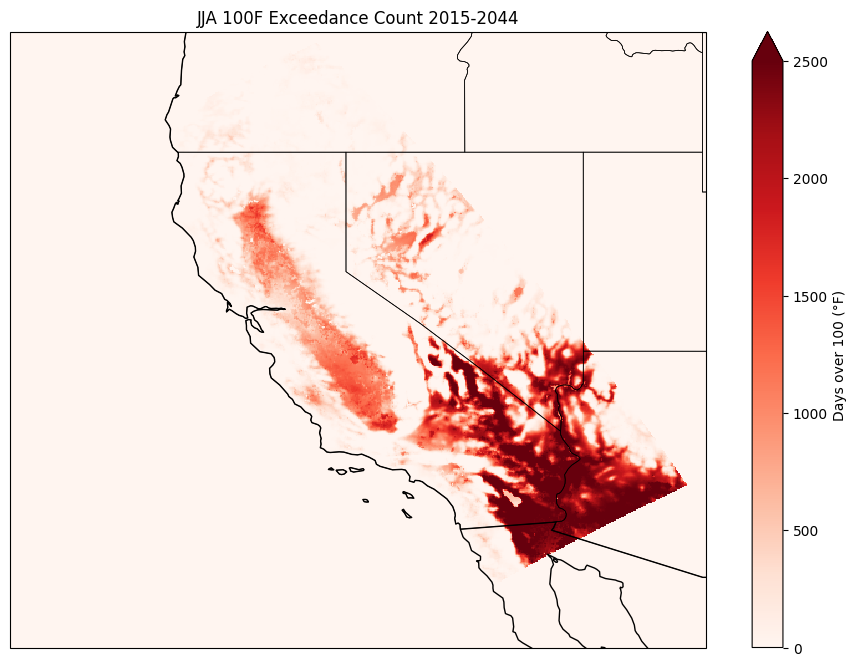

In [26]:
def map_100F(netcdf_file, variable_name="tasmax", projection=ccrs.PlateCarree(), cmap='Reds'):
    """
    Creates a map of the 100F Exceedance Counts from a NetCDF file.

    Args:
        netcdf_file (str): Path to the NetCDF file containing the 100F counts.
        variable_name (str): Name of the variable to plot. Defaults to "tasmax".
        projection (cartopy.crs.Projection): Cartopy projection to use. Defaults to PlateCarree.
        cmap (str): Colormap to use. Defaults to 'RdBu_r'.
    """
    try:
        ds = xr.open_dataset(netcdf_file)
        data = ds[variable_name]

        if 'lat' not in data.coords or 'lon' not in data.coords:
            print("Error: Latitude and longitude coordinates not found.")
            ds.close()
            return

        fig = plt.figure(figsize=(12, 8))
        ax = plt.axes(projection=projection)

        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.STATES, linewidth=0.5)

        data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, vmax=2500,cbar_kwargs={'label': 'Days over 100 (°F)'})

        plt.title("JJA 100F Exceedance Count 2015-2044")
        plt.show()

    except FileNotFoundError:
        print(f"Error: File not found at {netcdf_file}")
    except KeyError:
        print(f"Error: Variable '{variable_name}' not found in the file.")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        if 'ds' in locals():
            ds.close()

# Example usage (assuming you have the tasmax_diff.nc file from the previous code):
netcdf_file_path = "VCP_EXHEAT_01A-2__100F_hot_day_counts_2015-2044_MPI.nc"  # Path to the NetCDF file with the tasmax difference

map_100F(netcdf_file_path)

In [32]:
def count_hot_days(file_path):
    """
    Counts the number of days exceeding 100°F during JJA (June, July, August) 
    from 2015-2044 for each grid point in a NetCDF file.

    Args:
        file_path (str): Path to the NetCDF file (e.g., "TEST.nc").

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                         the count of hot days for each grid point.  Returns
                         None if there's an issue opening the file.
    """
    try:
        ds = xr.open_dataset(file_path)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:  # Catch other potential xarray errors
        print(f"Error opening dataset: {e}")
        return None

    # Convert temperature to Fahrenheit 
    ds['tasmax'] = ds['tasmax'] - 273.15  # Convert Kelvin to Celsius
    ds['tasmax'] = (ds['tasmax'] * 9/5) + 32 # Convert Celsius to Fahrenheit

    # Select June, July, and August
    jja_mask = ds['time.month'].isin([6, 7, 8])
    ds_jja = ds.sel(time=jja_mask)

    # Count days exceeding 100°F at each location
    hot_days = ds_jja['tasmax'] > 100
    hot_day_counts = hot_days.groupby('time.dayofyear').sum().sum(dim='dayofyear') # Sum over all days in JJA for each year, then sum over all years.

    return hot_day_counts

# Example usage:
file_path = "tasmax.MPI-ESM1-2-HR.ssp370.r3i1p1f1.2045-2074.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your file path
hot_day_counts = count_hot_days(file_path)

if hot_day_counts is not None:
    print(hot_day_counts)
    # Export to NetCDF
    try:
        hot_day_counts.to_netcdf("VCP_EXHEAT_01B-2__100F_hot_day_counts_2045-2074_MPI.nc")
        print("NetCDF file created successfully!")
    except Exception as e:
        print(f"Error exporting to NetCDF: {e}")

<xarray.DataArray 'tasmax' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
NetCDF file created successfully!


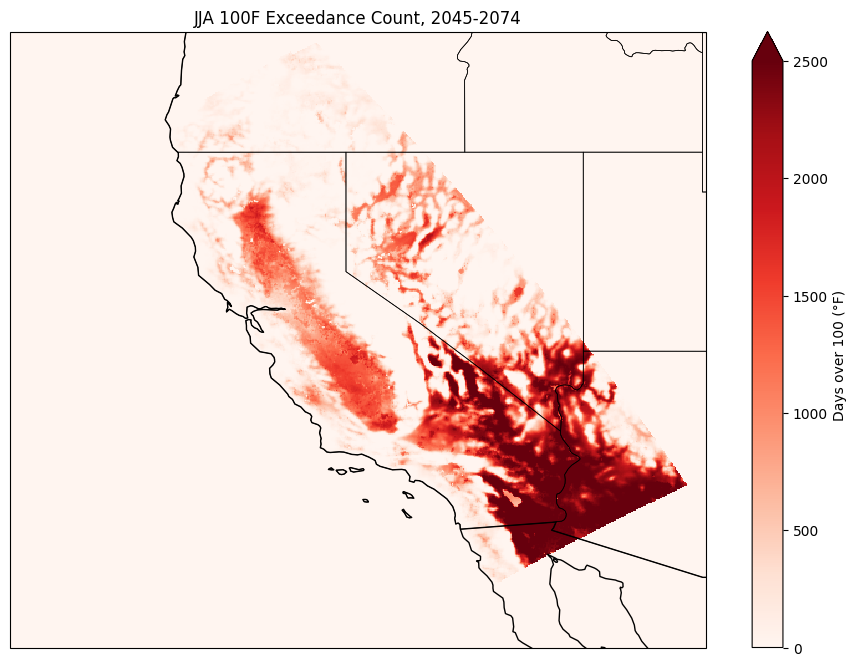

In [33]:
def map_100F(netcdf_file, variable_name="tasmax", projection=ccrs.PlateCarree(), cmap='Reds'):
    """
    Creates a map of the 100F Exceedance Counts from a NetCDF file.

    Args:
        netcdf_file (str): Path to the NetCDF file containing the 100F counts.
        variable_name (str): Name of the variable to plot. Defaults to "tasmax".
        projection (cartopy.crs.Projection): Cartopy projection to use. Defaults to PlateCarree.
        cmap (str): Colormap to use. Defaults to 'RdBu_r'.
    """
    try:
        ds = xr.open_dataset(netcdf_file)
        data = ds[variable_name]

        if 'lat' not in data.coords or 'lon' not in data.coords:
            print("Error: Latitude and longitude coordinates not found.")
            ds.close()
            return

        fig = plt.figure(figsize=(12, 8))
        ax = plt.axes(projection=projection)

        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.STATES, linewidth=0.5)

        data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap,vmax=2500, cbar_kwargs={'label': 'Days over 100 (°F)'})

        plt.title("JJA 100F Exceedance Count, 2045-2074")
        plt.show()

    except FileNotFoundError:
        print(f"Error: File not found at {netcdf_file}")
    except KeyError:
        print(f"Error: Variable '{variable_name}' not found in the file.")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        if 'ds' in locals():
            ds.close()

# Example usage (assuming you have the tasmax_diff.nc file from the previous code):
netcdf_file_path = "VCP_EXHEAT_01B-2__100F_hot_day_counts_2045-2074_MPI.nc"  # Path to the NetCDF file with the tasmax difference

map_100F(netcdf_file_path)

In [39]:
def count_hot_days(file_path):
    """
    Counts the number of days exceeding 100°F during JJA (June, July, August) 
    from 2015-2044 for each grid point in a NetCDF file.

    Args:
        file_path (str): Path to the NetCDF file (e.g., "TEST.nc").

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                         the count of hot days for each grid point.  Returns
                         None if there's an issue opening the file.
    """
    try:
        ds = xr.open_dataset(file_path)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:  # Catch other potential xarray errors
        print(f"Error opening dataset: {e}")
        return None

    # Convert temperature to Fahrenheit 
    ds['tasmax'] = ds['tasmax'] - 273.15  # Convert Kelvin to Celsius
    ds['tasmax'] = (ds['tasmax'] * 9/5) + 32 # Convert Celsius to Fahrenheit

    # Select June, July, and August
    jja_mask = ds['time.month'].isin([6, 7, 8])
    ds_jja = ds.sel(time=jja_mask)

    # Count days exceeding 100°F at each location
    hot_days = ds_jja['tasmax'] > 100
    hot_day_counts = hot_days.groupby('time.dayofyear').sum().sum(dim='dayofyear') # Sum over all days in JJA for each year, then sum over all years.

    return hot_day_counts

# Example usage:
file_path = "tasmax.MIROC6.ssp370.r1i1p1f1.2015-2044.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your file path
hot_day_counts = count_hot_days(file_path)

if hot_day_counts is not None:
    print(hot_day_counts)
    # Export to NetCDF
    try:
        hot_day_counts.to_netcdf("VCP_EXHEAT_01A-3__100F_hot_day_counts_2015-2044_MIROC6.nc")
        print("NetCDF file created successfully!")
    except Exception as e:
        print(f"Error exporting to NetCDF: {e}")

<xarray.DataArray 'tasmax' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
NetCDF file created successfully!


In [40]:
def count_hot_days(file_path):
    """
    Counts the number of days exceeding 100°F during JJA (June, July, August) 
    from 2015-2044 for each grid point in a NetCDF file.

    Args:
        file_path (str): Path to the NetCDF file (e.g., "TEST.nc").

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                         the count of hot days for each grid point.  Returns
                         None if there's an issue opening the file.
    """
    try:
        ds = xr.open_dataset(file_path)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:  # Catch other potential xarray errors
        print(f"Error opening dataset: {e}")
        return None

    # Convert temperature to Fahrenheit 
    ds['tasmax'] = ds['tasmax'] - 273.15  # Convert Kelvin to Celsius
    ds['tasmax'] = (ds['tasmax'] * 9/5) + 32 # Convert Celsius to Fahrenheit

    # Select June, July, and August
    jja_mask = ds['time.month'].isin([6, 7, 8])
    ds_jja = ds.sel(time=jja_mask)

    # Count days exceeding 100°F at each location
    hot_days = ds_jja['tasmax'] > 100
    hot_day_counts = hot_days.groupby('time.dayofyear').sum().sum(dim='dayofyear') # Sum over all days in JJA for each year, then sum over all years.

    return hot_day_counts

# Example usage:
file_path = "tasmax.MIROC6.ssp370.r1i1p1f1.2045-2074.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your file path
hot_day_counts = count_hot_days(file_path)

if hot_day_counts is not None:
    print(hot_day_counts)
    # Export to NetCDF
    try:
        hot_day_counts.to_netcdf("VCP_EXHEAT_01B-3__100F_hot_day_counts_2045-2074_MIROC6.nc")
        print("NetCDF file created successfully!")
    except Exception as e:
        print(f"Error exporting to NetCDF: {e}")

<xarray.DataArray 'tasmax' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
NetCDF file created successfully!


In [42]:
def count_hot_days(file_path):
    """
    Counts the number of days exceeding 100°F during JJA (June, July, August) 
    from 2015-2044 for each grid point in a NetCDF file.

    Args:
        file_path (str): Path to the NetCDF file (e.g., "TEST.nc").

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                         the count of hot days for each grid point.  Returns
                         None if there's an issue opening the file.
    """
    try:
        ds = xr.open_dataset(file_path)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:  # Catch other potential xarray errors
        print(f"Error opening dataset: {e}")
        return None

    # Convert temperature to Fahrenheit 
    ds['tasmax'] = ds['tasmax'] - 273.15  # Convert Kelvin to Celsius
    ds['tasmax'] = (ds['tasmax'] * 9/5) + 32 # Convert Celsius to Fahrenheit

    # Select June, July, and August
    jja_mask = ds['time.month'].isin([6, 7, 8])
    ds_jja = ds.sel(time=jja_mask)

    # Count days exceeding 100°F at each location
    hot_days = ds_jja['tasmax'] > 100
    hot_day_counts = hot_days.groupby('time.dayofyear').sum().sum(dim='dayofyear') # Sum over all days in JJA for each year, then sum over all years.

    return hot_day_counts

# Example usage:
file_path = "tasmax.FGOALS-g3.ssp370.r1i1p1f1.2015-2044.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your file path
hot_day_counts = count_hot_days(file_path)

if hot_day_counts is not None:
    print(hot_day_counts)
    # Export to NetCDF
    try:
        hot_day_counts.to_netcdf("VCP_EXHEAT_01A-4__100F_hot_day_counts_2015-2044_FGOALS.nc")
        print("NetCDF file created successfully!")
    except Exception as e:
        print(f"Error exporting to NetCDF: {e}")

<xarray.DataArray 'tasmax' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
NetCDF file created successfully!


In [43]:
def count_hot_days(file_path):
    """
    Counts the number of days exceeding 100°F during JJA (June, July, August) 
    from 2015-2044 for each grid point in a NetCDF file.

    Args:
        file_path (str): Path to the NetCDF file (e.g., "TEST.nc").

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                         the count of hot days for each grid point.  Returns
                         None if there's an issue opening the file.
    """
    try:
        ds = xr.open_dataset(file_path)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:  # Catch other potential xarray errors
        print(f"Error opening dataset: {e}")
        return None

    # Convert temperature to Fahrenheit 
    ds['tasmax'] = ds['tasmax'] - 273.15  # Convert Kelvin to Celsius
    ds['tasmax'] = (ds['tasmax'] * 9/5) + 32 # Convert Celsius to Fahrenheit

    # Select June, July, and August
    jja_mask = ds['time.month'].isin([6, 7, 8])
    ds_jja = ds.sel(time=jja_mask)

    # Count days exceeding 100°F at each location
    hot_days = ds_jja['tasmax'] > 100
    hot_day_counts = hot_days.groupby('time.dayofyear').sum().sum(dim='dayofyear') # Sum over all days in JJA for each year, then sum over all years.

    return hot_day_counts

# Example usage:
file_path = "tasmax.FGOALS-g3.ssp370.r1i1p1f1.2045-2074.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your file path
hot_day_counts = count_hot_days(file_path)

if hot_day_counts is not None:
    print(hot_day_counts)
    # Export to NetCDF
    try:
        hot_day_counts.to_netcdf("VCP_EXHEAT_01B-4__100F_hot_day_counts_2045-2074_FGOALS.nc")
        print("NetCDF file created successfully!")
    except Exception as e:
        print(f"Error exporting to NetCDF: {e}")

<xarray.DataArray 'tasmax' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
NetCDF file created successfully!


In [45]:
def count_hot_days(file_path):
    """
    Counts the number of days exceeding 100°F during JJA (June, July, August) 
    from 2015-2044 for each grid point in a NetCDF file.

    Args:
        file_path (str): Path to the NetCDF file (e.g., "TEST.nc").

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                         the count of hot days for each grid point.  Returns
                         None if there's an issue opening the file.
    """
    try:
        ds = xr.open_dataset(file_path)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:  # Catch other potential xarray errors
        print(f"Error opening dataset: {e}")
        return None

    # Convert temperature to Fahrenheit 
    ds['tasmax'] = ds['tasmax'] - 273.15  # Convert Kelvin to Celsius
    ds['tasmax'] = (ds['tasmax'] * 9/5) + 32 # Convert Celsius to Fahrenheit

    # Select June, July, and August
    jja_mask = ds['time.month'].isin([6, 7, 8])
    ds_jja = ds.sel(time=jja_mask)

    # Count days exceeding 100°F at each location
    hot_days = ds_jja['tasmax'] > 100
    hot_day_counts = hot_days.groupby('time.dayofyear').sum().sum(dim='dayofyear') # Sum over all days in JJA for each year, then sum over all years.

    return hot_day_counts

# Example usage:
file_path = "tasmax.EC-Earth3.ssp370.r1i1p1f1.2015-2044.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your file path
hot_day_counts = count_hot_days(file_path)

if hot_day_counts is not None:
    print(hot_day_counts)
    # Export to NetCDF
    try:
        hot_day_counts.to_netcdf("VCP_EXHEAT_01A-5__100F_hot_day_counts_2015-2044_Earth3.nc")
        print("NetCDF file created successfully!")
    except Exception as e:
        print(f"Error exporting to NetCDF: {e}")

<xarray.DataArray 'tasmax' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
NetCDF file created successfully!


In [47]:
def count_hot_days(file_path):
    """
    Counts the number of days exceeding 100°F during JJA (June, July, August) 
    from 2015-2044 for each grid point in a NetCDF file.

    Args:
        file_path (str): Path to the NetCDF file (e.g., "TEST.nc").

    Returns:
        xarray.DataArray: A DataArray with dimensions 'lat' and 'lon', containing
                         the count of hot days for each grid point.  Returns
                         None if there's an issue opening the file.
    """
    try:
        ds = xr.open_dataset(file_path)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:  # Catch other potential xarray errors
        print(f"Error opening dataset: {e}")
        return None

    # Convert temperature to Fahrenheit 
    ds['tasmax'] = ds['tasmax'] - 273.15  # Convert Kelvin to Celsius
    ds['tasmax'] = (ds['tasmax'] * 9/5) + 32 # Convert Celsius to Fahrenheit

    # Select June, July, and August
    jja_mask = ds['time.month'].isin([6, 7, 8])
    ds_jja = ds.sel(time=jja_mask)

    # Count days exceeding 100°F at each location
    hot_days = ds_jja['tasmax'] > 100
    hot_day_counts = hot_days.groupby('time.dayofyear').sum().sum(dim='dayofyear') # Sum over all days in JJA for each year, then sum over all years.

    return hot_day_counts

# Example usage:
file_path = "tasmax.EC-Earth3.ssp370.r1i1p1f1.2045-2074.LOCA2_CA_hybrid_v20230115.nc"  # Replace with your file path
hot_day_counts = count_hot_days(file_path)

if hot_day_counts is not None:
    print(hot_day_counts)
    # Export to NetCDF
    try:
        hot_day_counts.to_netcdf("VCP_EXHEAT_01B-5__100F_hot_day_counts_2045-2074_Earth3.nc")
        print("NetCDF file created successfully!")
    except Exception as e:
        print(f"Error exporting to NetCDF: {e}")

<xarray.DataArray 'tasmax' (lat: 495, lon: 559)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
NetCDF file created successfully!


In [51]:
import xarray as xr
import glob # For finding files, or you can list them manually
import os

# --- Configuration ---

# 1. Specify the path to your NetCDF files
# Option A: Use a wildcard pattern if your files are in the same directory
file_pattern = "VCP_EXHEAT_01A*.nc" # IMPORTANT: Change this to your actual path and pattern
netcdf_files = sorted(glob.glob(file_pattern))

# Option B: Manually list the file paths
# netcdf_files = [
#     "/path/to/your/files/file1.nc",
#     "/path/to/your/files/file2.nc",
#     "/path/to/your/files/file3.nc",
#     "/path/to/your/files/file4.nc",
#     "/path/to/your/files/file5.nc",
# ] # IMPORTANT: Change these to your actual file paths

# Check if files were found (if using glob)
if not netcdf_files:
    print(f"No files found matching pattern: {file_pattern}")
    print("Or, if manually listing, ensure the list is not empty.")
    # exit() # Or handle as appropriate

print(f"Found files: {netcdf_files}")

# 2. Specify the name of the variable you want to average
# This variable must exist in all your NetCDF files.
variable_name = "tasmax"  # IMPORTANT: Change this (e.g., 'temperature', 'precipitation')

# 3. Specify the name of the dimension that the files will be concatenated along.
# If your files have a coordinate like 'time' and these times are different,
# xarray might automatically use that. If they are just 5 distinct files
# for the same grid without a distinguishing coordinate, open_mfdataset
# will create a new dimension, often 'concat_dim'.
# We will explicitly tell it to concatenate along a new dimension called 'file_dim'.
# This makes the averaging step clearer.
concatenation_dim = "file_index"

# 4. Specify the output file path
output_filename = "VCP_EXHEAT_01A_100F_hot_day_counts_GENUSE-AVE_2015-2044.nc" # IMPORTANT: Change this
output_directory = os.path.dirname(output_filename)
if not os.path.exists(output_directory) and output_directory:
    os.makedirs(output_directory)
    print(f"Created output directory: {output_directory}")

# --- Processing ---

try:
    # 1. Load multiple NetCDF files
    # open_mfdataset can automatically combine files along a new or existing dimension.
    # We provide the list of files and tell it to concatenate them along our specified dimension.
    # We also pass preprocess if we want to ensure a consistent structure or select variables.
    def preprocess_for_mfdataset(ds):
        # Example: Select only the variable of interest to save memory,
        # or ensure the concatenation dimension doesn't already exist with a conflicting meaning.
        if variable_name not in ds.variables:
            raise ValueError(f"Variable '{variable_name}' not found in one of the files.")
        return ds[[variable_name]] # Keep only the target variable

    # If your files already have a 'time' dimension and you want to average over time:
    # ds_combined = xr.open_mfdataset(netcdf_files, combine='by_coords', parallel=True)
    # And then you would average over 'time':
    # averaged_data = ds_combined[variable_name].mean(dim='time')

    # For averaging across files where each file is a separate entity for the same grid:
    # We'll load them and concatenate them along a new dimension.
    list_of_datasets = [xr.open_dataset(f) for f in netcdf_files]

    # Check if all datasets have the required variable
    for i, ds_single in enumerate(list_of_datasets):
        if variable_name not in ds_single.variables:
            raise ValueError(f"Variable '{variable_name}' not found in file: {netcdf_files[i]}")

    # Concatenate along the new dimension
    ds_combined = xr.concat(list_of_datasets, dim=concatenation_dim)
    print("\nCombined dataset structure:")
    print(ds_combined)

    # 2. Calculate the average for each xy (lat/lon) location
    # The mean is calculated along the dimension that represents the different files.
    # If using open_mfdataset without a common coordinate like 'time', it often
    # creates a 'concat_dim'. If we used concat explicitly, it's 'file_index'.
    if variable_name in ds_combined:
        averaged_data_array = ds_combined[variable_name].mean(dim=concatenation_dim)
        print(f"\nCalculated average along dimension: '{concatenation_dim}'")
        print("\nAveraged data array structure:")
        print(averaged_data_array)
    else:
        raise ValueError(f"Variable '{variable_name}' not found in the combined dataset. Available variables: {list(ds_combined.data_vars)}")


    # 3. Prepare the dataset for export
    # The result of .mean() is a DataArray. We'll put it into a Dataset.
    # It's good practice to give the averaged variable a descriptive name
    # and copy relevant attributes.
    output_ds = xr.Dataset({f"{variable_name}_mean": averaged_data_array})

    # You might want to copy global attributes from one of the original files
    if list_of_datasets:
        output_ds.attrs = list_of_datasets[0].attrs
        output_ds.attrs['history'] = (
            f"Averaged from {len(netcdf_files)} files. "
            f"Original files pattern: {file_pattern if 'file_pattern' in locals() else 'manual list'}. "
            f"Averaged variable: {variable_name}."
        )
    if hasattr(averaged_data_array, 'attrs'):
        output_ds[f"{variable_name}_mean"].attrs = averaged_data_array.attrs
        output_ds[f"{variable_name}_mean"].attrs['long_name'] = f"Average of {averaged_data_array.attrs.get('long_name', variable_name)}"
        output_ds[f"{variable_name}_mean"].attrs['units'] = averaged_data_array.attrs.get('units', 'unknown')


    # Ensure latitude and longitude coordinates are preserved correctly.
    # If 'lat' and 'lon' were dimensions in the original files, they should be in averaged_data_array.
    # Example: if your coordinate names are different, adjust here.
    # output_ds = output_ds.rename({'latitude': 'lat', 'longitude': 'lon'}) # If needed

    print("\nOutput dataset structure:")
    print(output_ds)

    # 4. Export the file as NetCDF
    output_ds.to_netcdf(output_filename)
    print(f"\nSuccessfully saved averaged data to: {output_filename}")

except FileNotFoundError:
    print(f"Error: One or more input files not found. Please check paths: {netcdf_files}")
except ValueError as ve:
    print(f"ValueError: {ve}")
except KeyError as ke:
    print(f"KeyError: Likely an issue with variable or dimension names. {ke}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Found files: ['VCP_EXHEAT_01A-1_100F_hot_day_counts_2015-2044.nc', 'VCP_EXHEAT_01A-2__100F_hot_day_counts_2015-2044_MPI.nc', 'VCP_EXHEAT_01A-3__100F_hot_day_counts_2015-2044_MIROC6.nc', 'VCP_EXHEAT_01A-4__100F_hot_day_counts_2015-2044_FGOALS.nc', 'VCP_EXHEAT_01A-5__100F_hot_day_counts_2015-2044_Earth3.nc']

Combined dataset structure:
<xarray.Dataset> Size: 6MB
Dimensions:  (file_index: 5, lat: 495, lon: 559)
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
Dimensions without coordinates: file_index
Data variables:
    tasmax   (file_index, lat, lon) int32 6MB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0

Calculated average along dimension: 'file_index'

Averaged data array structure:
<xarray.DataArray 'tasmax' (lat: 495, lon: 559)> Size: 2MB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0.

In [53]:
import xarray as xr
import glob # For finding files, or you can list them manually
import os

# --- Configuration ---

# 1. Specify the path to your NetCDF files
# Option A: Use a wildcard pattern if your files are in the same directory
file_pattern = "VCP_EXHEAT_01B*.nc" # IMPORTANT: Change this to your actual path and pattern
netcdf_files = sorted(glob.glob(file_pattern))

# Option B: Manually list the file paths
# netcdf_files = [
#     "/path/to/your/files/file1.nc",
#     "/path/to/your/files/file2.nc",
#     "/path/to/your/files/file3.nc",
#     "/path/to/your/files/file4.nc",
#     "/path/to/your/files/file5.nc",
# ] # IMPORTANT: Change these to your actual file paths

# Check if files were found (if using glob)
if not netcdf_files:
    print(f"No files found matching pattern: {file_pattern}")
    print("Or, if manually listing, ensure the list is not empty.")
    # exit() # Or handle as appropriate

print(f"Found files: {netcdf_files}")

# 2. Specify the name of the variable you want to average
# This variable must exist in all your NetCDF files.
variable_name = "tasmax"  # IMPORTANT: Change this (e.g., 'temperature', 'precipitation')

# 3. Specify the name of the dimension that the files will be concatenated along.
# If your files have a coordinate like 'time' and these times are different,
# xarray might automatically use that. If they are just 5 distinct files
# for the same grid without a distinguishing coordinate, open_mfdataset
# will create a new dimension, often 'concat_dim'.
# We will explicitly tell it to concatenate along a new dimension called 'file_dim'.
# This makes the averaging step clearer.
concatenation_dim = "file_index"

# 4. Specify the output file path
output_filename = "VCP_EXHEAT_01B_100F_hot_day_counts_GENUSE-AVE_2045-2074.nc" # IMPORTANT: Change this
output_directory = os.path.dirname(output_filename)
if not os.path.exists(output_directory) and output_directory:
    os.makedirs(output_directory)
    print(f"Created output directory: {output_directory}")

# --- Processing ---

try:
    # 1. Load multiple NetCDF files
    # open_mfdataset can automatically combine files along a new or existing dimension.
    # We provide the list of files and tell it to concatenate them along our specified dimension.
    # We also pass preprocess if we want to ensure a consistent structure or select variables.
    def preprocess_for_mfdataset(ds):
        # Example: Select only the variable of interest to save memory,
        # or ensure the concatenation dimension doesn't already exist with a conflicting meaning.
        if variable_name not in ds.variables:
            raise ValueError(f"Variable '{variable_name}' not found in one of the files.")
        return ds[[variable_name]] # Keep only the target variable

    # If your files already have a 'time' dimension and you want to average over time:
    # ds_combined = xr.open_mfdataset(netcdf_files, combine='by_coords', parallel=True)
    # And then you would average over 'time':
    # averaged_data = ds_combined[variable_name].mean(dim='time')

    # For averaging across files where each file is a separate entity for the same grid:
    # We'll load them and concatenate them along a new dimension.
    list_of_datasets = [xr.open_dataset(f) for f in netcdf_files]

    # Check if all datasets have the required variable
    for i, ds_single in enumerate(list_of_datasets):
        if variable_name not in ds_single.variables:
            raise ValueError(f"Variable '{variable_name}' not found in file: {netcdf_files[i]}")

    # Concatenate along the new dimension
    ds_combined = xr.concat(list_of_datasets, dim=concatenation_dim)
    print("\nCombined dataset structure:")
    print(ds_combined)

    # 2. Calculate the average for each xy (lat/lon) location
    # The mean is calculated along the dimension that represents the different files.
    # If using open_mfdataset without a common coordinate like 'time', it often
    # creates a 'concat_dim'. If we used concat explicitly, it's 'file_index'.
    if variable_name in ds_combined:
        averaged_data_array = ds_combined[variable_name].mean(dim=concatenation_dim)
        print(f"\nCalculated average along dimension: '{concatenation_dim}'")
        print("\nAveraged data array structure:")
        print(averaged_data_array)
    else:
        raise ValueError(f"Variable '{variable_name}' not found in the combined dataset. Available variables: {list(ds_combined.data_vars)}")


    # 3. Prepare the dataset for export
    # The result of .mean() is a DataArray. We'll put it into a Dataset.
    # It's good practice to give the averaged variable a descriptive name
    # and copy relevant attributes.
    output_ds = xr.Dataset({f"{variable_name}_mean": averaged_data_array})

    # You might want to copy global attributes from one of the original files
    if list_of_datasets:
        output_ds.attrs = list_of_datasets[0].attrs
        output_ds.attrs['history'] = (
            f"Averaged from {len(netcdf_files)} files. "
            f"Original files pattern: {file_pattern if 'file_pattern' in locals() else 'manual list'}. "
            f"Averaged variable: {variable_name}."
        )
    if hasattr(averaged_data_array, 'attrs'):
        output_ds[f"{variable_name}_mean"].attrs = averaged_data_array.attrs
        output_ds[f"{variable_name}_mean"].attrs['long_name'] = f"Average of {averaged_data_array.attrs.get('long_name', variable_name)}"
        output_ds[f"{variable_name}_mean"].attrs['units'] = averaged_data_array.attrs.get('units', 'unknown')


    # Ensure latitude and longitude coordinates are preserved correctly.
    # If 'lat' and 'lon' were dimensions in the original files, they should be in averaged_data_array.
    # Example: if your coordinate names are different, adjust here.
    # output_ds = output_ds.rename({'latitude': 'lat', 'longitude': 'lon'}) # If needed

    print("\nOutput dataset structure:")
    print(output_ds)

    # 4. Export the file as NetCDF
    output_ds.to_netcdf(output_filename)
    print(f"\nSuccessfully saved averaged data to: {output_filename}")

except FileNotFoundError:
    print(f"Error: One or more input files not found. Please check paths: {netcdf_files}")
except ValueError as ve:
    print(f"ValueError: {ve}")
except KeyError as ke:
    print(f"KeyError: Likely an issue with variable or dimension names. {ke}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Found files: ['VCP_EXHEAT_01B-1_100F_hot_day_counts_2045-2074.nc', 'VCP_EXHEAT_01B-2__100F_hot_day_counts_2045-2074_MPI.nc', 'VCP_EXHEAT_01B-3__100F_hot_day_counts_2045-2074_MIROC6.nc', 'VCP_EXHEAT_01B-4__100F_hot_day_counts_2045-2074_FGOALS.nc', 'VCP_EXHEAT_01B-5__100F_hot_day_counts_2045-2074_Earth3.nc']

Combined dataset structure:
<xarray.Dataset> Size: 6MB
Dimensions:  (file_index: 5, lat: 495, lon: 559)
Coordinates:
  * lat      (lat) float32 2kB 29.58 29.61 29.64 29.67 ... 44.95 44.98 45.02
  * lon      (lon) float32 2kB 231.6 231.6 231.6 231.7 ... 249.0 249.0 249.0
Dimensions without coordinates: file_index
Data variables:
    tasmax   (file_index, lat, lon) int32 6MB 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0

Calculated average along dimension: 'file_index'

Averaged data array structure:
<xarray.DataArray 'tasmax' (lat: 495, lon: 559)> Size: 2MB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0.

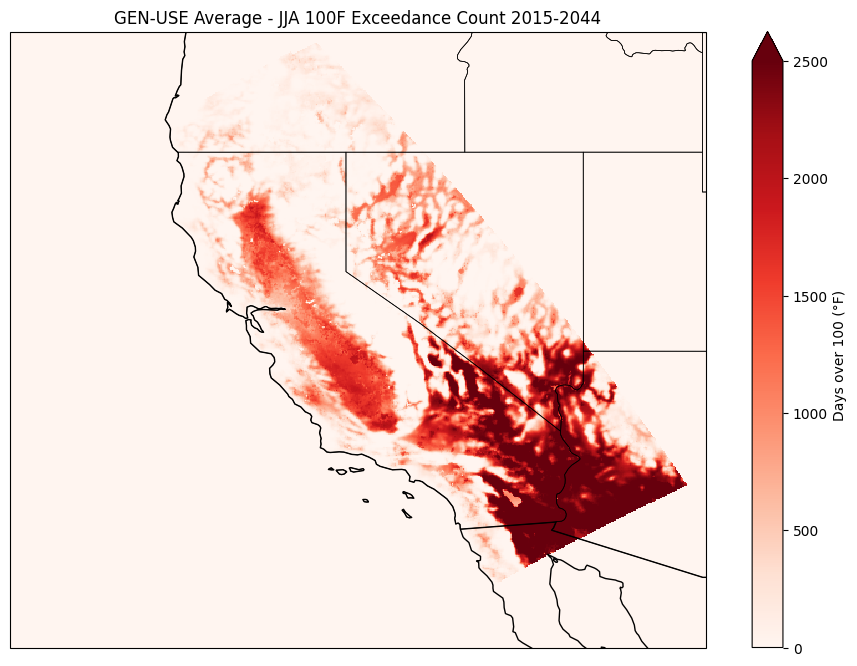

In [57]:
def map_100F(netcdf_file, variable_name="tasmax_mean", projection=ccrs.PlateCarree(), cmap='Reds'):
    """
    Creates a map of the 100F Exceedance Counts from a NetCDF file.

    Args:
        netcdf_file (str): Path to the NetCDF file containing the 100F counts.
        variable_name (str): Name of the variable to plot. Defaults to "tasmax".
        projection (cartopy.crs.Projection): Cartopy projection to use. Defaults to PlateCarree.
        cmap (str): Colormap to use. Defaults to 'RdBu_r'.
    """
    try:
        ds = xr.open_dataset(netcdf_file)
        data = ds[variable_name]

        if 'lat' not in data.coords or 'lon' not in data.coords:
            print("Error: Latitude and longitude coordinates not found.")
            ds.close()
            return

        fig = plt.figure(figsize=(12, 8))
        ax = plt.axes(projection=projection)

        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.STATES, linewidth=0.5)

        data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=cmap, vmax=2500,cbar_kwargs={'label': 'Days over 100 (°F)'})

        plt.title("GEN-USE Average - JJA 100F Exceedance Count 2015-2044")
        plt.show()

    except FileNotFoundError:
        print(f"Error: File not found at {netcdf_file}")
    except KeyError:
        print(f"Error: Variable '{variable_name}' not found in the file.")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        if 'ds' in locals():
            ds.close()

# Example usage (assuming you have the tasmax_diff.nc file from the previous code):
netcdf_file_path = "VCP_EXHEAT_01B_100F_hot_day_counts_GENUSE-AVE_2045-2074.nc"  # Path to the NetCDF file with the tasmax difference

map_100F(netcdf_file_path)

In [67]:
import xarray as xr
import matplotlib.pyplot as plt
import itertools
import glob
import os
import numpy as np
from scipy import stats # Import an alias for scipy.stats

# --- Configuration ---

# 1. Specify the path to your NetCDF files (exactly 5 files)
# Option A: Use a wildcard pattern if your files are in the same directory
file_pattern = "VCP_EXHEAT_01A*.nc"  # IMPORTANT: Change this
netcdf_files_paths = sorted(glob.glob(file_pattern))

# Option B: Manually list the file paths
# netcdf_files_paths = [
#     "/path/to/your/files/file1.nc",
#     "/path/to/your/files/file2.nc",
#     "/path/to/your/files/file3.nc",
#     "/path/to/your/files/file4.nc",
#     "/path/to/your/files/file5.nc",
# ] # IMPORTANT: Change these

# Ensure exactly 5 files are found/listed
if len(netcdf_files_paths) != 6:
    raise ValueError(f"Expected 5 NetCDF files, but found {len(netcdf_files_paths)} with pattern '{file_pattern}' or in manual list.")

print(f"Using NetCDF files: {netcdf_files_paths}")

# 2. Specify the name of the variable you want to plot
# This variable must exist in all your NetCDF files.
variable_name = "tasmax"  # IMPORTANT: Change this (e.g., 'temperature', 'precipitation')

# 3. Specify names for your latitude and longitude coordinates if they are not standard
# (xarray often auto-detects 'lat', 'lon', 'latitude', 'longitude')
# If your coordinate names are different, uncomment and set them:
# lat_coord_name = 'custom_lat_name'
# lon_coord_name = 'custom_lon_name'

# 4. Handling other dimensions (e.g., time, level)
# If your variable is not just (lat, lon), how to reduce it?
# Options:
#   - 'select_first': Take the first slice along any additional dimensions.
#   - 'mean': Take the mean along any additional dimensions.
#   - None: Assume the variable is already 2D (lat, lon).
handle_extra_dims_method = 'select_first'  # or 'mean', or None

# 5. Specify the output directory for the plots
output_plot_dir = "plots/"  # IMPORTANT: Change this
if not os.path.exists(output_plot_dir):
    os.makedirs(output_plot_dir)
    print(f"Created output directory: {output_plot_dir}")

# --- Helper Function to Load and Prepare Data ---
def load_and_prepare_data(filepath, var_name, handle_dims_method):
    """Loads a NetCDF file, extracts the variable, and reduces to 2D (lat, lon) if needed."""
    try:
        ds = xr.open_dataset(filepath)
        if var_name not in ds:
            raise ValueError(f"Variable '{var_name}' not found in file {filepath}")
        data_array = ds[var_name]

        # Identify non-lat/lon dimensions
        possible_lat_dims = ['lat', 'latitude', 'yc', 'rlat', 'y']
        possible_lon_dims = ['lon', 'longitude', 'xc', 'rlon', 'x']

        actual_lat_dim = None
        actual_lon_dim = None

        if 'lat_coord_name' in globals() and lat_coord_name in data_array.dims:
            actual_lat_dim = lat_coord_name
        else:
            for d_name in possible_lat_dims:
                if d_name in data_array.dims:
                    actual_lat_dim = d_name
                    break
        
        if 'lon_coord_name' in globals() and lon_coord_name in data_array.dims:
            actual_lon_dim = lon_coord_name
        else:
            for d_name in possible_lon_dims:
                if d_name in data_array.dims:
                    actual_lon_dim = d_name
                    break
        
        if not actual_lat_dim or not actual_lon_dim:
            # Fallback: assume the first two dimensions if only two exist and names weren't found
            if len(data_array.dims) == 2:
                print(f"Warning: Could not reliably identify lat/lon dimensions by name in {filepath} for variable {var_name}. Assuming dims are ('{data_array.dims[0]}', '{data_array.dims[1]}').")
                actual_lat_dim, actual_lon_dim = data_array.dims[0], data_array.dims[1] # Make an assumption
            else:
                raise ValueError(f"Could not reliably identify latitude/longitude dimensions in {filepath} for variable {var_name}. Found dims: {data_array.dims}. Please specify lat_coord_name and lon_coord_name if they are non-standard or check data structure.")

        extra_dims = [dim for dim in data_array.dims if dim not in [actual_lat_dim, actual_lon_dim]]

        if extra_dims:
            if handle_dims_method == 'select_first':
                slicer = {dim: 0 for dim in extra_dims}
                data_array_2d = data_array.isel(**slicer)
                print(f"File {os.path.basename(filepath)}: Selected first slice for dimensions {extra_dims}")
            elif handle_dims_method == 'mean':
                data_array_2d = data_array.mean(dim=extra_dims)
                print(f"File {os.path.basename(filepath)}: Took mean over dimensions {extra_dims}")
            elif handle_dims_method is None and extra_dims:
                 raise ValueError(f"Variable {var_name} in {filepath} has extra dimensions {extra_dims} but handle_extra_dims_method is None.")
            else: # also covers handle_dims_method is None and no extra_dims
                data_array_2d = data_array
        else:
            data_array_2d = data_array # Already 2D or no method specified for extra_dims (which means it should be 2D)

        if len(data_array_2d.dims) != 2:
             raise ValueError(f"Processed data for {var_name} in {filepath} is not 2D after attempting to handle extra dimensions. Final dimensions: {data_array_2d.dims}")

        # Ensure actual_lat_dim and actual_lon_dim are present in data_array_2d
        if actual_lat_dim not in data_array_2d.dims or actual_lon_dim not in data_array_2d.dims:
            raise ValueError(f"Latitude ('{actual_lat_dim}') or longitude ('{actual_lon_dim}') dimension not found in the 2D processed data array from {filepath}. Dimensions found: {data_array_2d.dims}")


        return data_array_2d.stack(points=(actual_lat_dim, actual_lon_dim)).dropna(dim="points")

    except Exception as e:
        print(f"Error processing file {filepath}: {e}")
        raise

# --- Load all datasets ---
prepared_data = {}
file_basenames = []
for fp in netcdf_files_paths:
    basename = os.path.basename(fp)
    file_basenames.append(basename)
    try:
        print(f"\nProcessing {basename}...")
        prepared_data[basename] = load_and_prepare_data(fp, variable_name, handle_extra_dims_method)
    except Exception:
        print(f"Failed to load or prepare data from {basename}. This file will be skipped in comparisons.")
        # Do not add to prepared_data if loading failed
        continue

if len(prepared_data) < 2:
    raise SystemExit("Need at least two successfully loaded datasets to make comparisons.")


# --- Generate combinations and create scatter plots ---
# Filter file_basenames to only include those that were successfully loaded
valid_file_basenames = [name for name in file_basenames if name in prepared_data]
combinations = list(itertools.combinations(valid_file_basenames, 2))

if not combinations:
    raise SystemExit("No valid combinations of files to plot (less than 2 files loaded successfully).")

print(f"\nGenerating {len(combinations)} scatter plots...")

for i, (file1_name, file2_name) in enumerate(combinations):
    print(f"Plotting {i+1}/{len(combinations)}: {file1_name} vs {file2_name}")

    data1 = prepared_data[file1_name]
    data2 = prepared_data[file2_name]

    # Align data points using inner join to ensure we only plot common, non-NaN points
    common_points_data1, common_points_data2 = xr.align(data1, data2, join='inner')

    if common_points_data1.size == 0 or common_points_data2.size == 0:
        print(f"No common data points found between {file1_name} and {file2_name} after alignment. Skipping plot.")
        continue

    x_values = common_points_data1.values
    y_values = common_points_data2.values

    # Ensure x_values and y_values are finite for linregress
    finite_mask = np.isfinite(x_values) & np.isfinite(y_values)
    x_values_clean = x_values[finite_mask]
    y_values_clean = y_values[finite_mask]

    if len(x_values_clean) < 2: # Need at least 2 points for regression
        print(f"Not enough finite data points (<2) for regression between {file1_name} and {file2_name}. Skipping R² calculation for this plot.")
        r_squared_text = "R²: N/A (insufficient data)"
    else:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_values_clean, y_values_clean)
        r_squared = r_value**2
        r_squared_text = f"$R^2 = {r_squared:.2f}$" # Format R² to 2 decimal places

    plt.figure(figsize=(10, 8))
    plt.scatter(x_values_clean, y_values_clean, alpha=0.5, s=5) # Plot only clean data

    # Add a 1:1 line for reference
    # Determine min/max from the clean data for the 1:1 line to be relevant
    if len(x_values_clean) > 0:
        min_val = min(np.nanmin(x_values_clean), np.nanmin(y_values_clean))
        max_val = max(np.nanmax(x_values_clean), np.nanmax(y_values_clean))
        plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="1:1 Line")
    else: # Fallback if all data was NaN after cleaning
        plt.plot([0,1], [0,1], 'r--', lw=2, label="1:1 Line (no valid data for range)")


    plt.title(f"Scatter Plot: {variable_name}\n{file1_name} vs {file2_name}", fontsize=14)
    plt.xlabel(f"{variable_name} from {file1_name} ({data1.attrs.get('units', '')})", fontsize=12)
    plt.ylabel(f"{variable_name} from {file2_name} ({data2.attrs.get('units', '')})", fontsize=12)
    
    # Add R-squared value to the plot
    # Position the text. transform=plt.gca().transAxes means coordinates are (0,0) bottom-left to (1,1) top-right of axes.
    plt.text(0.05, 0.95, r_squared_text, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='wheat', alpha=0.5))

    plt.grid(True, linestyle=':', alpha=0.7)
    plt.legend(loc='lower right') # Adjust legend location if it overlaps with text
    plt.tight_layout()

    plot_filename = os.path.join(output_plot_dir, f"scatter_{variable_name}_{file1_name.replace('.nc','').replace('.','_')}_vs_{file2_name.replace('.nc','').replace('.','_')}.png")
    plt.savefig(plot_filename)
    plt.close() # Close the figure to free memory

print(f"\nAll scatter plots saved to {output_plot_dir}")

Using NetCDF files: ['VCP_EXHEAT_01A-1_100F_hot_day_counts_2015-2044.nc', 'VCP_EXHEAT_01A-2__100F_hot_day_counts_2015-2044_MPI.nc', 'VCP_EXHEAT_01A-3__100F_hot_day_counts_2015-2044_MIROC6.nc', 'VCP_EXHEAT_01A-4__100F_hot_day_counts_2015-2044_FGOALS.nc', 'VCP_EXHEAT_01A-5__100F_hot_day_counts_2015-2044_Earth3.nc', 'VCP_EXHEAT_01A_100F_hot_day_counts_GENUSE-AVE_2015-2044.nc']

Processing VCP_EXHEAT_01A-1_100F_hot_day_counts_2015-2044.nc...

Processing VCP_EXHEAT_01A-2__100F_hot_day_counts_2015-2044_MPI.nc...

Processing VCP_EXHEAT_01A-3__100F_hot_day_counts_2015-2044_MIROC6.nc...

Processing VCP_EXHEAT_01A-4__100F_hot_day_counts_2015-2044_FGOALS.nc...

Processing VCP_EXHEAT_01A-5__100F_hot_day_counts_2015-2044_Earth3.nc...

Processing VCP_EXHEAT_01A_100F_hot_day_counts_GENUSE-AVE_2015-2044.nc...
Error processing file VCP_EXHEAT_01A_100F_hot_day_counts_GENUSE-AVE_2015-2044.nc: Variable 'tasmax' not found in file VCP_EXHEAT_01A_100F_hot_day_counts_GENUSE-AVE_2015-2044.nc
Failed to load or 

In [78]:
import xarray as xr
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
import os
import joblib # For saving PCA model

# --- Configuration ---

# 1. Specify the path to your NetCDF files (e.g., 5 files)
file_pattern = "VCP_EXHEAT_01A*.nc"  # IMPORTANT: Change this
netcdf_files_paths = sorted(glob.glob(file_pattern))

# Option B: Manually list the file paths
# netcdf_files_paths = [
#     "/path/to/your/files/file1.nc",
#     # ... add all 5 file paths ...
# ] # IMPORTANT: Change these

if not netcdf_files_paths:
    raise ValueError(f"No files found matching pattern: {file_pattern}. Or, if manually listing, ensure the list is not empty.")
print(f"Using {len(netcdf_files_paths)} NetCDF files: {netcdf_files_paths}")

# 2. Specify the name of the variable for PCA
variable_name = "tasmax"  # IMPORTANT: Change this (e.g., 'temperature')

# 3. Specify names for your latitude and longitude coordinates (if not standard)
# lat_coord_name = 'custom_lat_name'
# lon_coord_name = 'custom_lon_name'

# 4. How to define samples for PCA:
#    'each_timestep_as_one_sample': All timesteps from all files are concatenated.
#                                   Results in n_samples = total_timesteps.
#    'each_file_as_one_sample': Each file provides one sample.
#                               Requires 'time_reduction_in_file' if files have a time dimension.
pca_sample_definition = 'each_timestep_as_one_sample' # Or 'each_file_as_one_sample'

# 5. If pca_sample_definition is 'each_file_as_one_sample' AND files have a time dimension:
#    'mean': Take the mean over the time dimension within each file.
#    'first': Take the first time step within each file.
#    None: If files are 2D (no time dim), or if an error should be raised if time dim exists.
time_reduction_in_file = 'mean' # Applicable if pca_sample_definition is 'each_file_as_one_sample'

# 6. Handling other extra dimensions (e.g., level) before PCA processing
#    'select_first': Take the first slice along any additional (non-time, non-lat, non-lon) dimensions.
#    'mean': Take the mean along such additional dimensions.
#    None: Assume no other extra dimensions, or raise error if they exist.
handle_other_extra_dims = 'select_first'

# 7. Number of Principal Components
#    Can be an integer, or a float between 0 and 1 (e.g., 0.95 for 95% explained variance),
#    or None to keep all components up to min(n_samples, n_features).
n_pca_components = None # Or, e.g., 5 or 0.99

# 8. Output directory for plots and PCA model
output_dir = "pca_output-early/" # IMPORTANT: Change this
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
plot_subdir_maps = os.path.join(output_dir, "pc_maps")
plot_subdir_scores = os.path.join(output_dir, "pc_scores")
if not os.path.exists(plot_subdir_maps): os.makedirs(plot_subdir_maps)
if not os.path.exists(plot_subdir_scores): os.makedirs(plot_subdir_scores)

# --- Helper Function to Load and Prepare Data from one file ---
def load_prepare_single_file_for_pca(filepath, var_name, sample_def, time_reduct, extra_dim_handle):
    """Loads data from one file, handles dimensions, and flattens spatial features."""
    print(f"Processing file for PCA: {os.path.basename(filepath)}")
    try:
        ds = xr.open_dataset(filepath)
        if var_name not in ds:
            raise ValueError(f"Variable '{var_name}' not found in {filepath}")
        data_array = ds[var_name].copy() # Work on a copy

        # Identify lat/lon/time dimensions (similar to previous scripts)
        possible_lat_dims = ['lat', 'latitude', 'yc', 'rlat', 'y']
        possible_lon_dims = ['lon', 'longitude', 'xc', 'rlon', 'x']
        possible_time_dims = ['time', 't', 'datetime']

        actual_lat_dim, actual_lon_dim, actual_time_dim = None, None, None
        # (Simplified dim detection; adapt robust detection from scatter plot script if needed)
        for d in data_array.dims:
            if d.lower() in possible_lat_dims and not actual_lat_dim: actual_lat_dim = d
            elif d.lower() in possible_lon_dims and not actual_lon_dim: actual_lon_dim = d
            elif d.lower() in possible_time_dims and not actual_time_dim: actual_time_dim = d
        
        if 'lat_coord_name' in globals() and lat_coord_name in data_array.dims: actual_lat_dim = lat_coord_name
        if 'lon_coord_name' in globals() and lon_coord_name in data_array.dims: actual_lon_dim = lon_coord_name
        if not actual_lat_dim or not actual_lon_dim:
            raise ValueError(f"Latitude or Longitude dimension could not be identified in {filepath}. Found: {data_array.dims}")

        other_dims = [d for d in data_array.dims if d not in [actual_lat_dim, actual_lon_dim, actual_time_dim]]
        if other_dims and extra_dim_handle:
            slicer_agg = {}
            for od in other_dims:
                if extra_dim_handle == 'select_first': slicer_agg[od] = 0
                elif extra_dim_handle == 'mean': data_array = data_array.mean(dim=od) # Apply mean iteratively
            if extra_dim_handle == 'select_first' and slicer_agg: # Apply isel once
                 data_array = data_array.isel(**slicer_agg)
            print(f"  Handled extra dims {other_dims} using '{extra_dim_handle}'")
        elif other_dims and not extra_dim_handle:
            raise ValueError(f"File {filepath} has extra dimensions {other_dims} but 'handle_other_extra_dims' is None.")

        # Handle time dimension based on pca_sample_definition
        processed_slices = []
        if sample_def == 'each_file_as_one_sample':
            if actual_time_dim and actual_time_dim in data_array.dims: # Check if time_dim is still in data_array
                if time_reduct == 'mean':
                    data_slice = data_array.mean(dim=actual_time_dim)
                elif time_reduct == 'first':
                    data_slice = data_array.isel({actual_time_dim: 0})
                else:
                    raise ValueError(f"File {filepath} has time dimension '{actual_time_dim}', but 'time_reduction_in_file' is '{time_reduct}' or None.")
                processed_slices.append(data_slice)
                print(f"  Reduced time using '{time_reduct}', 1 sample from this file.")
            elif actual_time_dim and actual_time_dim not in data_array.dims: # Time dim was removed by extra_dim handling
                 processed_slices.append(data_array) # data_array is already reduced
                 print(f"  Time dimension '{actual_time_dim}' was already handled (e.g. by extra_dim_handle). Using resulting 2D slice.")
            else: # No time dimension
                processed_slices.append(data_array) # Assume it's already a single 2D slice
                print("  No time dimension found, using as 1 sample from this file.")
        
        elif sample_def == 'each_timestep_as_one_sample':
            if actual_time_dim and actual_time_dim in data_array.dims:
                for t_idx in range(data_array.sizes[actual_time_dim]):
                    processed_slices.append(data_array.isel({actual_time_dim: t_idx}))
                print(f"  Extracted {len(processed_slices)} time steps as samples from this file.")
            elif actual_time_dim and actual_time_dim not in data_array.dims:
                 raise ValueError(f"Sample definition is 'each_timestep_as_one_sample' but time dimension '{actual_time_dim}' was removed by extra_dim handling for file {filepath}.")
            else: # No time dimension, but want each timestep (so, just this one "timestep")
                processed_slices.append(data_array)
                print("  No time dimension, using the single slice as 1 sample for this file.")
        else:
            raise ValueError(f"Unknown pca_sample_definition: {sample_def}")

        # Flatten spatial dimensions for each slice
        flattened_data_list = []
        spatial_coords = None # To store coords for reshaping later
        original_spatial_shape = None

        for i, slice_2d in enumerate(processed_slices):
            if not all(d in slice_2d.dims for d in [actual_lat_dim, actual_lon_dim]):
                raise ValueError(f"Slice {i} from {filepath} is not 2D with expected lat/lon dims after processing. Dims: {slice_2d.dims}")
            
            if spatial_coords is None: # Get coords from the first valid slice
                spatial_coords = {
                    actual_lat_dim: slice_2d[actual_lat_dim],
                    actual_lon_dim: slice_2d[actual_lon_dim]
                }
                original_spatial_shape = (slice_2d.sizes[actual_lat_dim], slice_2d.sizes[actual_lon_dim])

            # Stack lat, lon into a single 'feature' dimension
            # Ensure no NaNs in features; PCA can be sensitive. Fill or check.
            # Here we fill NaNs with the mean of the slice, an alternative is to drop features (columns)
            # or samples (rows) with too many NaNs *after* stacking all data.
            # For simplicity here, fillna before stacking to ensure all spatial points are kept.
            # A more sophisticated approach might involve imputation or masking.
            stacked_slice = slice_2d.fillna(slice_2d.mean()).stack(feature=(actual_lat_dim, actual_lon_dim))
            flattened_data_list.append(stacked_slice.data)
            
        if not flattened_data_list:
            return None, None, None
            
        return np.vstack(flattened_data_list), spatial_coords, original_spatial_shape

    except Exception as e:
        print(f"  Error in load_prepare_single_file_for_pca for {filepath}: {e}")
        raise # Or return None to allow skipping problematic files

# --- Main PCA Workflow ---

all_flattened_data = []
first_valid_spatial_coords = None
first_valid_spatial_shape = None
sample_identifiers = [] # To keep track of which file/time each sample came from

for filepath_idx, filepath in enumerate(netcdf_files_paths):
    try:
        flattened_file_data, s_coords, s_shape = load_prepare_single_file_for_pca(
            filepath, variable_name, pca_sample_definition, time_reduction_in_file, handle_other_extra_dims
        )
        if flattened_file_data is not None:
            all_flattened_data.append(flattened_file_data)
            if first_valid_spatial_coords is None and s_coords:
                first_valid_spatial_coords = s_coords
                first_valid_spatial_shape = s_shape
            
            # Create sample identifiers
            num_samples_from_file = flattened_file_data.shape[0]
            base_filename = os.path.basename(filepath)
            if pca_sample_definition == 'each_timestep_as_one_sample' and num_samples_from_file > 1:
                for i in range(num_samples_from_file):
                    sample_identifiers.append(f"{base_filename}_t{i}")
            else:
                 sample_identifiers.append(base_filename)


    except Exception as e:
        print(f"Skipping file {filepath} due to error: {e}")
        continue

if not all_flattened_data:
    raise SystemExit("No data successfully processed for PCA.")

# Concatenate data from all files
X = np.vstack(all_flattened_data)
print(f"\nTotal data shape for PCA (samples, features): {X.shape}")

if X.shape[0] == 0 or X.shape[1] == 0:
    raise SystemExit("Data matrix X is empty. Cannot perform PCA.")
if first_valid_spatial_coords is None or first_valid_spatial_shape is None:
     raise SystemExit("Spatial coordinate information was not captured. Cannot reshape PCs.")

# Check for NaNs/Infs in the final matrix X
if np.isnan(X).any() or np.isinf(X).any():
    print("Warning: NaNs or Infs detected in the data matrix X. Attempting to fill with column means.")
    col_mean = np.nanmean(X, axis=0)
    inds = np.where(np.isnan(X))
    X[inds] = np.take(col_mean, inds[1])
    if np.isinf(X).any(): # If Infs still exist after NaN fill
        print("Warning: Infs still present. Replacing Infs with 0. This might affect PCA results.")
        X[np.isinf(X)] = 0 # A simple strategy; more advanced imputation might be needed
    if np.isnan(X).any(): # If NaNs still persist (e.g. all-NaN column)
        raise SystemExit("Data matrix X still contains NaNs after attempting to fill. Cannot perform PCA.")


# 1. Standardize Data (crucial for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data standardized.")

# 2. Apply PCA
if n_pca_components is not None and isinstance(n_pca_components, float) and 0 < n_pca_components < 1:
    print(f"PCA: Retaining components explaining {n_pca_components*100:.1f}% of variance.")
elif n_pca_components is not None:
    print(f"PCA: Attempting to retain {n_pca_components} components.")
else:
    print("PCA: Retaining all possible components.")

pca = PCA(n_components=n_pca_components, svd_solver='auto')
try:
    pc_scores = pca.fit_transform(X_scaled) # (n_samples, n_components)
except ValueError as ve:
    if "n_components=" in str(ve) and "must be between 0 and min(n_samples, n_features)" in str(ve):
        max_comps = min(X_scaled.shape[0], X_scaled.shape[1])
        print(f"Adjusting n_components for PCA to {max_comps} (min(n_samples, n_features)) due to previous error: {ve}")
        pca = PCA(n_components=max_comps, svd_solver='auto')
        pc_scores = pca.fit_transform(X_scaled)
    else:
        raise ve


principal_components = pca.components_       # Eigenvectors (n_components, n_features)
explained_variance_ratio = pca.explained_variance_ratio_
n_actual_components = pca.n_components_

print(f"PCA applied. Number of components retained: {n_actual_components}")
print(f"Shape of PC scores (samples, components): {pc_scores.shape}")
print(f"Shape of Principal Components (components, features): {principal_components.shape}")

# Save the PCA model and scaler
joblib.dump(pca, os.path.join(output_dir, 'pca_model.joblib'))
joblib.dump(scaler, os.path.join(output_dir, 'scaler_model.joblib'))
print(f"PCA model and scaler saved to {output_dir}")

# --- Visualize Results ---

# 1. Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_actual_components + 1), explained_variance_ratio, alpha=0.7, align='center',
        label=f'Individual explained variance (Total: {np.sum(explained_variance_ratio)*100:.2f}%)')
plt.step(range(1, n_actual_components + 1), np.cumsum(explained_variance_ratio), where='mid',
         label='Cumulative explained variance', color='red')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, n_actual_components + 1))
plt.legend(loc='best')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "explained_variance.png"))
plt.close()
print("Explained variance plot saved.")

# 2. Principal Component Spatial Patterns (Eigenvectors)
# Reshape PCs back to spatial maps
lat_coords = first_valid_spatial_coords[list(first_valid_spatial_coords.keys())[0]] # Assuming first key is lat
lon_coords = first_valid_spatial_coords[list(first_valid_spatial_coords.keys())[1]] # Assuming second key is lon
lat_dim_name = lat_coords.name
lon_dim_name = lon_coords.name

# Create a DataArray template for unstacking
# The 'feature' multi-index was created from (actual_lat_dim, actual_lon_dim)
# Need to ensure the order is correct when creating the multi-index for unstacking.
# The stacked 'feature' coordinate is implicitly created by xarray based on the order of dims in stack()
# We need to recreate this for our new DataArray.
# `first_valid_spatial_coords` contains the coordinates for lat and lon.
# The feature multi-index should match how `stacked_slice.feature` was created.

# Create the feature MultiIndex based on the actual lat/lon dimension names used in stacking
# For example, if actual_lat_dim was 'lat' and actual_lon_dim was 'lon':
# feature_index = pd.MultiIndex.from_product([lat_coords.data, lon_coords.data], names=[lat_dim_name, lon_dim_name])
# However, xarray's stack creates a flat 'feature' coordinate based on the original combined index.
# The easiest way is to use the 'feature' coordinate from one of the stacked slices if we had saved it.
# Since we didn't, we rely on the `principal_components` having the same feature order.

# Assuming `first_valid_spatial_shape` = (n_lat, n_lon)
# And `principal_components` row vectors are ordered consistently with `data.stack(feature=(lat,lon))`
# then `reshape` should work.

for i in range(min(n_actual_components, 10)): # Plot top 10 PCs or fewer
    pc_map_flat = principal_components[i, :]
    # Reshape directly using numpy, assuming feature order is (lat_dim_size * lon_dim_size) consistent with C-order flattening
    pc_map_reshaped = pc_map_flat.reshape(first_valid_spatial_shape)

    plt.figure(figsize=(10, 7))
    # Use pcolormesh for lat/lon plots. If coords are regular, imshow is faster.
    # We have lat_coords and lon_coords from first_valid_spatial_coords
    plt.pcolormesh(lon_coords, lat_coords, pc_map_reshaped, cmap='RdBu_r', shading='auto')
    plt.colorbar(label=f'PC {i+1} Loading')
    plt.title(f'Spatial Pattern of Principal Component {i+1}\n(Explains {explained_variance_ratio[i]*100:.2f}% variance)')
    plt.xlabel(lon_dim_name)
    plt.ylabel(lat_dim_name)
    plt.tight_layout()
    plt.savefig(os.path.join(plot_subdir_maps, f"pc_{i+1}_spatial_map.png"))
    plt.close()
print(f"Spatial maps for top {min(n_actual_components, 10)} PCs saved to {plot_subdir_maps}")


# 3. PC Scores (Time Series or Sample Series)
# pc_scores has shape (n_samples, n_components)
sample_axis = np.arange(pc_scores.shape[0])

for i in range(min(n_actual_components, 10)): # Plot scores for top PCs
    plt.figure(figsize=(12, 5))
    plt.plot(sample_axis, pc_scores[:, i], marker='o', linestyle='-', markersize=4)
    plt.title(f'PC {i+1} Scores (Time Series / Sample Progression)')
    plt.xlabel('Sample Index (Time or File-based)')
    plt.ylabel(f'PC {i+1} Score')
    plt.grid(True, linestyle=':', alpha=0.7)
    
    # If sample_identifiers match sample_axis length, use them for x-ticks
    if len(sample_identifiers) == len(sample_axis) and len(sample_axis) < 30: # Avoid too many ticks
        plt.xticks(sample_axis, sample_identifiers, rotation=45, ha="right")
    elif len(sample_identifiers) == len(sample_axis) and len(sample_axis) >= 30:
         # Show fewer ticks for many samples
        tick_indices = np.linspace(0, len(sample_axis) - 1, num=10, dtype=int)
        plt.xticks(sample_axis[tick_indices], [sample_identifiers[j] for j in tick_indices], rotation=45, ha="right")


    plt.tight_layout()
    plt.savefig(os.path.join(plot_subdir_scores, f"pc_{i+1}_scores.png"))
    plt.close()
print(f"PC scores plots for top {min(n_actual_components, 10)} PCs saved to {plot_subdir_scores}")

print("\nPCA analysis complete.")

Using 6 NetCDF files: ['VCP_EXHEAT_01A-1_100F_hot_day_counts_2015-2044.nc', 'VCP_EXHEAT_01A-2__100F_hot_day_counts_2015-2044_MPI.nc', 'VCP_EXHEAT_01A-3__100F_hot_day_counts_2015-2044_MIROC6.nc', 'VCP_EXHEAT_01A-4__100F_hot_day_counts_2015-2044_FGOALS.nc', 'VCP_EXHEAT_01A-5__100F_hot_day_counts_2015-2044_Earth3.nc', 'VCP_EXHEAT_01A_100F_hot_day_counts_GENUSE-AVE_2015-2044.nc']
Processing file for PCA: VCP_EXHEAT_01A-1_100F_hot_day_counts_2015-2044.nc
  No time dimension, using the single slice as 1 sample for this file.
Processing file for PCA: VCP_EXHEAT_01A-2__100F_hot_day_counts_2015-2044_MPI.nc
  No time dimension, using the single slice as 1 sample for this file.
Processing file for PCA: VCP_EXHEAT_01A-3__100F_hot_day_counts_2015-2044_MIROC6.nc
  No time dimension, using the single slice as 1 sample for this file.
Processing file for PCA: VCP_EXHEAT_01A-4__100F_hot_day_counts_2015-2044_FGOALS.nc
  No time dimension, using the single slice as 1 sample for this file.
Processing file 

In [76]:
import xarray as xr
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
import os
import joblib # For saving PCA model

# --- Configuration ---

# 1. Specify the path to your NetCDF files (e.g., 5 files)
file_pattern = "VCP_EXHEAT_01B*.nc"  # IMPORTANT: Change this
netcdf_files_paths = sorted(glob.glob(file_pattern))

# Option B: Manually list the file paths
# netcdf_files_paths = [
#     "/path/to/your/files/file1.nc",
#     # ... add all 5 file paths ...
# ] # IMPORTANT: Change these

if not netcdf_files_paths:
    raise ValueError(f"No files found matching pattern: {file_pattern}. Or, if manually listing, ensure the list is not empty.")
print(f"Using {len(netcdf_files_paths)} NetCDF files: {netcdf_files_paths}")

# 2. Specify the name of the variable for PCA
variable_name = "tasmax"  # IMPORTANT: Change this (e.g., 'temperature')

# 3. Specify names for your latitude and longitude coordinates (if not standard)
# lat_coord_name = 'custom_lat_name'
# lon_coord_name = 'custom_lon_name'

# 4. How to define samples for PCA:
#    'each_timestep_as_one_sample': All timesteps from all files are concatenated.
#                                   Results in n_samples = total_timesteps.
#    'each_file_as_one_sample': Each file provides one sample.
#                               Requires 'time_reduction_in_file' if files have a time dimension.
pca_sample_definition = 'each_timestep_as_one_sample' # Or 'each_file_as_one_sample'

# 5. If pca_sample_definition is 'each_file_as_one_sample' AND files have a time dimension:
#    'mean': Take the mean over the time dimension within each file.
#    'first': Take the first time step within each file.
#    None: If files are 2D (no time dim), or if an error should be raised if time dim exists.
time_reduction_in_file = 'mean' # Applicable if pca_sample_definition is 'each_file_as_one_sample'

# 6. Handling other extra dimensions (e.g., level) before PCA processing
#    'select_first': Take the first slice along any additional (non-time, non-lat, non-lon) dimensions.
#    'mean': Take the mean along such additional dimensions.
#    None: Assume no other extra dimensions, or raise error if they exist.
handle_other_extra_dims = 'select_first'

# 7. Number of Principal Components
#    Can be an integer, or a float between 0 and 1 (e.g., 0.95 for 95% explained variance),
#    or None to keep all components up to min(n_samples, n_features).
n_pca_components = None # Or, e.g., 5 or 0.99

# 8. Output directory for plots and PCA model
output_dir = "pca_output-late/" # IMPORTANT: Change this
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
plot_subdir_maps = os.path.join(output_dir, "pc_maps")
plot_subdir_scores = os.path.join(output_dir, "pc_scores")
if not os.path.exists(plot_subdir_maps): os.makedirs(plot_subdir_maps)
if not os.path.exists(plot_subdir_scores): os.makedirs(plot_subdir_scores)

# --- Helper Function to Load and Prepare Data from one file ---
def load_prepare_single_file_for_pca(filepath, var_name, sample_def, time_reduct, extra_dim_handle):
    """Loads data from one file, handles dimensions, and flattens spatial features."""
    print(f"Processing file for PCA: {os.path.basename(filepath)}")
    try:
        ds = xr.open_dataset(filepath)
        if var_name not in ds:
            raise ValueError(f"Variable '{var_name}' not found in {filepath}")
        data_array = ds[var_name].copy() # Work on a copy

        # Identify lat/lon/time dimensions (similar to previous scripts)
        possible_lat_dims = ['lat', 'latitude', 'yc', 'rlat', 'y']
        possible_lon_dims = ['lon', 'longitude', 'xc', 'rlon', 'x']
        possible_time_dims = ['time', 't', 'datetime']

        actual_lat_dim, actual_lon_dim, actual_time_dim = None, None, None
        # (Simplified dim detection; adapt robust detection from scatter plot script if needed)
        for d in data_array.dims:
            if d.lower() in possible_lat_dims and not actual_lat_dim: actual_lat_dim = d
            elif d.lower() in possible_lon_dims and not actual_lon_dim: actual_lon_dim = d
            elif d.lower() in possible_time_dims and not actual_time_dim: actual_time_dim = d
        
        if 'lat_coord_name' in globals() and lat_coord_name in data_array.dims: actual_lat_dim = lat_coord_name
        if 'lon_coord_name' in globals() and lon_coord_name in data_array.dims: actual_lon_dim = lon_coord_name
        if not actual_lat_dim or not actual_lon_dim:
            raise ValueError(f"Latitude or Longitude dimension could not be identified in {filepath}. Found: {data_array.dims}")

        other_dims = [d for d in data_array.dims if d not in [actual_lat_dim, actual_lon_dim, actual_time_dim]]
        if other_dims and extra_dim_handle:
            slicer_agg = {}
            for od in other_dims:
                if extra_dim_handle == 'select_first': slicer_agg[od] = 0
                elif extra_dim_handle == 'mean': data_array = data_array.mean(dim=od) # Apply mean iteratively
            if extra_dim_handle == 'select_first' and slicer_agg: # Apply isel once
                 data_array = data_array.isel(**slicer_agg)
            print(f"  Handled extra dims {other_dims} using '{extra_dim_handle}'")
        elif other_dims and not extra_dim_handle:
            raise ValueError(f"File {filepath} has extra dimensions {other_dims} but 'handle_other_extra_dims' is None.")

        # Handle time dimension based on pca_sample_definition
        processed_slices = []
        if sample_def == 'each_file_as_one_sample':
            if actual_time_dim and actual_time_dim in data_array.dims: # Check if time_dim is still in data_array
                if time_reduct == 'mean':
                    data_slice = data_array.mean(dim=actual_time_dim)
                elif time_reduct == 'first':
                    data_slice = data_array.isel({actual_time_dim: 0})
                else:
                    raise ValueError(f"File {filepath} has time dimension '{actual_time_dim}', but 'time_reduction_in_file' is '{time_reduct}' or None.")
                processed_slices.append(data_slice)
                print(f"  Reduced time using '{time_reduct}', 1 sample from this file.")
            elif actual_time_dim and actual_time_dim not in data_array.dims: # Time dim was removed by extra_dim handling
                 processed_slices.append(data_array) # data_array is already reduced
                 print(f"  Time dimension '{actual_time_dim}' was already handled (e.g. by extra_dim_handle). Using resulting 2D slice.")
            else: # No time dimension
                processed_slices.append(data_array) # Assume it's already a single 2D slice
                print("  No time dimension found, using as 1 sample from this file.")
        
        elif sample_def == 'each_timestep_as_one_sample':
            if actual_time_dim and actual_time_dim in data_array.dims:
                for t_idx in range(data_array.sizes[actual_time_dim]):
                    processed_slices.append(data_array.isel({actual_time_dim: t_idx}))
                print(f"  Extracted {len(processed_slices)} time steps as samples from this file.")
            elif actual_time_dim and actual_time_dim not in data_array.dims:
                 raise ValueError(f"Sample definition is 'each_timestep_as_one_sample' but time dimension '{actual_time_dim}' was removed by extra_dim handling for file {filepath}.")
            else: # No time dimension, but want each timestep (so, just this one "timestep")
                processed_slices.append(data_array)
                print("  No time dimension, using the single slice as 1 sample for this file.")
        else:
            raise ValueError(f"Unknown pca_sample_definition: {sample_def}")

        # Flatten spatial dimensions for each slice
        flattened_data_list = []
        spatial_coords = None # To store coords for reshaping later
        original_spatial_shape = None

        for i, slice_2d in enumerate(processed_slices):
            if not all(d in slice_2d.dims for d in [actual_lat_dim, actual_lon_dim]):
                raise ValueError(f"Slice {i} from {filepath} is not 2D with expected lat/lon dims after processing. Dims: {slice_2d.dims}")
            
            if spatial_coords is None: # Get coords from the first valid slice
                spatial_coords = {
                    actual_lat_dim: slice_2d[actual_lat_dim],
                    actual_lon_dim: slice_2d[actual_lon_dim]
                }
                original_spatial_shape = (slice_2d.sizes[actual_lat_dim], slice_2d.sizes[actual_lon_dim])

            # Stack lat, lon into a single 'feature' dimension
            # Ensure no NaNs in features; PCA can be sensitive. Fill or check.
            # Here we fill NaNs with the mean of the slice, an alternative is to drop features (columns)
            # or samples (rows) with too many NaNs *after* stacking all data.
            # For simplicity here, fillna before stacking to ensure all spatial points are kept.
            # A more sophisticated approach might involve imputation or masking.
            stacked_slice = slice_2d.fillna(slice_2d.mean()).stack(feature=(actual_lat_dim, actual_lon_dim))
            flattened_data_list.append(stacked_slice.data)
            
        if not flattened_data_list:
            return None, None, None
            
        return np.vstack(flattened_data_list), spatial_coords, original_spatial_shape

    except Exception as e:
        print(f"  Error in load_prepare_single_file_for_pca for {filepath}: {e}")
        raise # Or return None to allow skipping problematic files

# --- Main PCA Workflow ---

all_flattened_data = []
first_valid_spatial_coords = None
first_valid_spatial_shape = None
sample_identifiers = [] # To keep track of which file/time each sample came from

for filepath_idx, filepath in enumerate(netcdf_files_paths):
    try:
        flattened_file_data, s_coords, s_shape = load_prepare_single_file_for_pca(
            filepath, variable_name, pca_sample_definition, time_reduction_in_file, handle_other_extra_dims
        )
        if flattened_file_data is not None:
            all_flattened_data.append(flattened_file_data)
            if first_valid_spatial_coords is None and s_coords:
                first_valid_spatial_coords = s_coords
                first_valid_spatial_shape = s_shape
            
            # Create sample identifiers
            num_samples_from_file = flattened_file_data.shape[0]
            base_filename = os.path.basename(filepath)
            if pca_sample_definition == 'each_timestep_as_one_sample' and num_samples_from_file > 1:
                for i in range(num_samples_from_file):
                    sample_identifiers.append(f"{base_filename}_t{i}")
            else:
                 sample_identifiers.append(base_filename)


    except Exception as e:
        print(f"Skipping file {filepath} due to error: {e}")
        continue

if not all_flattened_data:
    raise SystemExit("No data successfully processed for PCA.")

# Concatenate data from all files
X = np.vstack(all_flattened_data)
print(f"\nTotal data shape for PCA (samples, features): {X.shape}")

if X.shape[0] == 0 or X.shape[1] == 0:
    raise SystemExit("Data matrix X is empty. Cannot perform PCA.")
if first_valid_spatial_coords is None or first_valid_spatial_shape is None:
     raise SystemExit("Spatial coordinate information was not captured. Cannot reshape PCs.")

# Check for NaNs/Infs in the final matrix X
if np.isnan(X).any() or np.isinf(X).any():
    print("Warning: NaNs or Infs detected in the data matrix X. Attempting to fill with column means.")
    col_mean = np.nanmean(X, axis=0)
    inds = np.where(np.isnan(X))
    X[inds] = np.take(col_mean, inds[1])
    if np.isinf(X).any(): # If Infs still exist after NaN fill
        print("Warning: Infs still present. Replacing Infs with 0. This might affect PCA results.")
        X[np.isinf(X)] = 0 # A simple strategy; more advanced imputation might be needed
    if np.isnan(X).any(): # If NaNs still persist (e.g. all-NaN column)
        raise SystemExit("Data matrix X still contains NaNs after attempting to fill. Cannot perform PCA.")


# 1. Standardize Data (crucial for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data standardized.")

# 2. Apply PCA
if n_pca_components is not None and isinstance(n_pca_components, float) and 0 < n_pca_components < 1:
    print(f"PCA: Retaining components explaining {n_pca_components*100:.1f}% of variance.")
elif n_pca_components is not None:
    print(f"PCA: Attempting to retain {n_pca_components} components.")
else:
    print("PCA: Retaining all possible components.")

pca = PCA(n_components=n_pca_components, svd_solver='auto')
try:
    pc_scores = pca.fit_transform(X_scaled) # (n_samples, n_components)
except ValueError as ve:
    if "n_components=" in str(ve) and "must be between 0 and min(n_samples, n_features)" in str(ve):
        max_comps = min(X_scaled.shape[0], X_scaled.shape[1])
        print(f"Adjusting n_components for PCA to {max_comps} (min(n_samples, n_features)) due to previous error: {ve}")
        pca = PCA(n_components=max_comps, svd_solver='auto')
        pc_scores = pca.fit_transform(X_scaled)
    else:
        raise ve


principal_components = pca.components_       # Eigenvectors (n_components, n_features)
explained_variance_ratio = pca.explained_variance_ratio_
n_actual_components = pca.n_components_

print(f"PCA applied. Number of components retained: {n_actual_components}")
print(f"Shape of PC scores (samples, components): {pc_scores.shape}")
print(f"Shape of Principal Components (components, features): {principal_components.shape}")

# Save the PCA model and scaler
joblib.dump(pca, os.path.join(output_dir, 'pca_model.joblib'))
joblib.dump(scaler, os.path.join(output_dir, 'scaler_model.joblib'))
print(f"PCA model and scaler saved to {output_dir}")

# --- Visualize Results ---

# 1. Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_actual_components + 1), explained_variance_ratio, alpha=0.7, align='center',
        label=f'Individual explained variance (Total: {np.sum(explained_variance_ratio)*100:.2f}%)')
plt.step(range(1, n_actual_components + 1), np.cumsum(explained_variance_ratio), where='mid',
         label='Cumulative explained variance', color='red')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, n_actual_components + 1))
plt.legend(loc='best')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "explained_variance.png"))
plt.close()
print("Explained variance plot saved.")

# 2. Principal Component Spatial Patterns (Eigenvectors)
# Reshape PCs back to spatial maps
lat_coords = first_valid_spatial_coords[list(first_valid_spatial_coords.keys())[0]] # Assuming first key is lat
lon_coords = first_valid_spatial_coords[list(first_valid_spatial_coords.keys())[1]] # Assuming second key is lon
lat_dim_name = lat_coords.name
lon_dim_name = lon_coords.name

# Create a DataArray template for unstacking
# The 'feature' multi-index was created from (actual_lat_dim, actual_lon_dim)
# Need to ensure the order is correct when creating the multi-index for unstacking.
# The stacked 'feature' coordinate is implicitly created by xarray based on the order of dims in stack()
# We need to recreate this for our new DataArray.
# `first_valid_spatial_coords` contains the coordinates for lat and lon.
# The feature multi-index should match how `stacked_slice.feature` was created.

# Create the feature MultiIndex based on the actual lat/lon dimension names used in stacking
# For example, if actual_lat_dim was 'lat' and actual_lon_dim was 'lon':
# feature_index = pd.MultiIndex.from_product([lat_coords.data, lon_coords.data], names=[lat_dim_name, lon_dim_name])
# However, xarray's stack creates a flat 'feature' coordinate based on the original combined index.
# The easiest way is to use the 'feature' coordinate from one of the stacked slices if we had saved it.
# Since we didn't, we rely on the `principal_components` having the same feature order.

# Assuming `first_valid_spatial_shape` = (n_lat, n_lon)
# And `principal_components` row vectors are ordered consistently with `data.stack(feature=(lat,lon))`
# then `reshape` should work.

for i in range(min(n_actual_components, 10)): # Plot top 10 PCs or fewer
    pc_map_flat = principal_components[i, :]
    # Reshape directly using numpy, assuming feature order is (lat_dim_size * lon_dim_size) consistent with C-order flattening
    pc_map_reshaped = pc_map_flat.reshape(first_valid_spatial_shape)

    plt.figure(figsize=(10, 7))
    # Use pcolormesh for lat/lon plots. If coords are regular, imshow is faster.
    # We have lat_coords and lon_coords from first_valid_spatial_coords
    plt.pcolormesh(lon_coords, lat_coords, pc_map_reshaped, cmap='RdBu_r', shading='auto')
    plt.colorbar(label=f'PC {i+1} Loading')
    plt.title(f'Spatial Pattern of Principal Component {i+1}\n(Explains {explained_variance_ratio[i]*100:.2f}% variance)')
    plt.xlabel(lon_dim_name)
    plt.ylabel(lat_dim_name)
    plt.tight_layout()
    plt.savefig(os.path.join(plot_subdir_maps, f"pc_{i+1}_spatial_map.png"))
    plt.close()
print(f"Spatial maps for top {min(n_actual_components, 10)} PCs saved to {plot_subdir_maps}")


# 3. PC Scores (Time Series or Sample Series)
# pc_scores has shape (n_samples, n_components)
sample_axis = np.arange(pc_scores.shape[0])

for i in range(min(n_actual_components, 10)): # Plot scores for top PCs
    plt.figure(figsize=(12, 5))
    plt.plot(sample_axis, pc_scores[:, i], marker='o', linestyle='-', markersize=4)
    plt.title(f'PC {i+1} Scores (Time Series / Sample Progression)')
    plt.xlabel('Sample Index (Time or File-based)')
    plt.ylabel(f'PC {i+1} Score')
    plt.grid(True, linestyle=':', alpha=0.7)
    
    # If sample_identifiers match sample_axis length, use them for x-ticks
    if len(sample_identifiers) == len(sample_axis) and len(sample_axis) < 30: # Avoid too many ticks
        plt.xticks(sample_axis, sample_identifiers, rotation=45, ha="right")
    elif len(sample_identifiers) == len(sample_axis) and len(sample_axis) >= 30:
         # Show fewer ticks for many samples
        tick_indices = np.linspace(0, len(sample_axis) - 1, num=10, dtype=int)
        plt.xticks(sample_axis[tick_indices], [sample_identifiers[j] for j in tick_indices], rotation=45, ha="right")


    plt.tight_layout()
    plt.savefig(os.path.join(plot_subdir_scores, f"pc_{i+1}_scores.png"))
    plt.close()
print(f"PC scores plots for top {min(n_actual_components, 10)} PCs saved to {plot_subdir_scores}")

print("\nPCA analysis complete.")

Using 6 NetCDF files: ['VCP_EXHEAT_01B-1_100F_hot_day_counts_2045-2074.nc', 'VCP_EXHEAT_01B-2__100F_hot_day_counts_2045-2074_MPI.nc', 'VCP_EXHEAT_01B-3__100F_hot_day_counts_2045-2074_MIROC6.nc', 'VCP_EXHEAT_01B-4__100F_hot_day_counts_2045-2074_FGOALS.nc', 'VCP_EXHEAT_01B-5__100F_hot_day_counts_2045-2074_Earth3.nc', 'VCP_EXHEAT_01B_100F_hot_day_counts_GENUSE-AVE_2045-2074.nc']
Processing file for PCA: VCP_EXHEAT_01B-1_100F_hot_day_counts_2045-2074.nc
  No time dimension, using the single slice as 1 sample for this file.
Processing file for PCA: VCP_EXHEAT_01B-2__100F_hot_day_counts_2045-2074_MPI.nc
  No time dimension, using the single slice as 1 sample for this file.
Processing file for PCA: VCP_EXHEAT_01B-3__100F_hot_day_counts_2045-2074_MIROC6.nc
  No time dimension, using the single slice as 1 sample for this file.
Processing file for PCA: VCP_EXHEAT_01B-4__100F_hot_day_counts_2045-2074_FGOALS.nc
  No time dimension, using the single slice as 1 sample for this file.
Processing file 